# Clustering

+ Author: Jingxuan Yang
+ E-mail: yangjx20@mails.tsinghua.edu.cn
+ Page: www.jingxuanyang.com
+ Date: 2021-06-05
+ Project: Pattern Recognition, homework 13
+ Purpose: Implement three clustering algorithms on MNIST dataset

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sklearn.cluster as ss
from sklearn import metrics
import matplotlib.pyplot as plt
from mnist import MNIST

## Load MNIST dataset

In [2]:
mndata = MNIST('../mnist/', return_type='numpy')
mndata.gz = True
train_images, train_labels = mndata.load_training()

## Define NMI function

In [3]:
def NMI(gt, cl, k):
    """
    :param cl: cluster labels
    """
    gt_info = 0
    cl_info = 0
    muture_info = 0

    for i in range(k):
        cl_group = np.where(cl == i)[0]
        cl_info += cl_group.size * np.log10(cl_group.size / cl.size)

    for i in range(10):
        gt_group = np.where(gt == i)[0]
        gt_info += gt_group.size * np.log10(gt_group.size / gt.size)
        for j in range(k):
            cl_group = np.where(cl == j)[0]
            muture = np.where(cl[gt_group] == j)[0]
            if muture.size > 0:
                muture_info += muture.size * np.log10(
                    gt.size * muture.size / cl_group.size / gt_group.size)

    return muture_info / (gt_info * cl_info)**0.5

## Define K-means function

In [21]:
def Kmeans(init='k-means++', n_samples=3 * 10**6, n_clusters=10, n_init=1, random_state=0, si=False):
    data = train_images[:n_samples]
    label = train_labels[:n_samples]
    if init == 'inverse':
        init = data[0:1].repeat(n_clusters, axis=0)
    clf = ss.KMeans(n_clusters=n_clusters, init=init, n_init=n_init,random_state=random_state)
    clf.fit(data)

    if si:
        return metrics.silhouette_score(data,clf.labels_,sample_size=data.shape[0])
    else:
        return clf.inertia_, NMI(label, clf.labels_, n_clusters)

## Define hierarchical clustering function

In [82]:
def hierarchical(linkage='single', n_clusters=10, n_samples=300, si=False):
    data = train_images[:n_samples]
    label = train_labels[:n_samples]

    clf = ss.AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    clf.fit(data)

    if si:
        return metrics.silhouette_score(data,clf.labels_,sample_size=data.shape[0])
    else:
        return NMI(label, clf.labels_, 10)

## Define spectual clustering function

In [6]:
def spectual(n_clusters=10, aff='rbf', para=1, n_samples=300, si=False):
    data = train_images[:n_samples]
    label = train_labels[:n_samples]

    if aff == 'rbf':
        clf = ss.SpectralClustering(n_clusters=n_clusters, gamma=para, affinity=aff)
    else:
        clf = ss.SpectralClustering(n_clusters=n_clusters,
                                    affinity=aff,
                                    n_neighbors=para)

    clf.fit(data)

    if si:
        return metrics.silhouette_score(data,clf.labels_,sample_size=data.shape[0])
    else:
        return NMI(label, clf.labels_, n_clusters)
    

## Obtain results of K-means

In [69]:
kmeans_result = [[0 for i in range(2)] for j in range(3)]
kmeans_result[0][0], kmeans_result[0][1] = Kmeans(n_samples=3000)
kmeans_result[1][0], kmeans_result[1][1] = Kmeans(init='random', n_samples=3000)
kmeans_result[2][0], kmeans_result[2][1] = Kmeans(init='inverse', n_samples=3000)
# kmeans_result[2][0], kmeans_result[2][1] = Kmeans(init='inverse')
kmeans_df = pd.DataFrame(kmeans_result,columns=['J_e','NMI'],index=['k-means++','random','conincide'])
kmeans_df

,J_e,NMI
k-means++,7.527918e+09,0.519912
random,7.514934e+09,0.503458
conincide,7.700415e+09,0.473963


In [55]:
kmeans_je = []
kmeans_nmi = []
sample_points = range(100,3000,100)
for i in sample_points:
    je,nmi = Kmeans(init='random', n_samples=i)
    kmeans_je.append(je)
    kmeans_nmi.append(nmi)


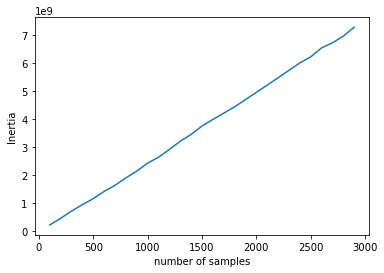

In [61]:
plt.plot(sample_points, kmeans_je)
plt.xlabel('number of samples')
plt.ylabel('Inertia')
# plt.savefig('../doc/figures/kmeans_innertia.pdf',pad_inches=0,bbox_inches='tight')

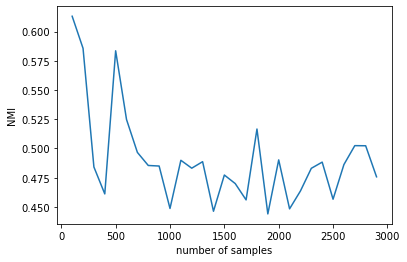

In [62]:
plt.plot(sample_points,kmeans_nmi)
plt.xlabel('number of samples')
plt.ylabel('NMI')
# plt.savefig('../doc/figures/kmeans_nmi.pdf',pad_inches=0,bbox_inches='tight')

In [63]:
kmeans_je = []
kmeans_nmi = []
sample_points = range(100,3000,100)
for i in sample_points:
    je,nmi = Kmeans(n_samples=i)
    kmeans_je.append(je)
    kmeans_nmi.append(nmi)

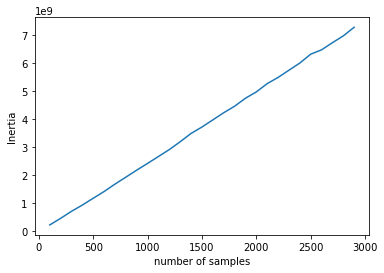

In [64]:
plt.plot(sample_points, kmeans_je)
plt.xlabel('number of samples')
plt.ylabel('Inertia')
# plt.savefig('../doc/figures/kmeans_innertia_pp.pdf',pad_inches=0,bbox_inches='tight')

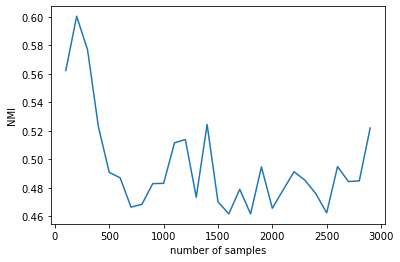

In [65]:
plt.plot(sample_points,kmeans_nmi)
plt.xlabel('number of samples')
plt.ylabel('NMI')
# plt.savefig('../doc/figures/kmeans_nmi_pp.pdf',pad_inches=0,bbox_inches='tight')

In [66]:
kmeans_je = []
kmeans_nmi = []
sample_points = range(100,3000,100)
for i in sample_points:
    je,nmi = Kmeans(init='inverse', n_samples=i)
    kmeans_je.append(je)
    kmeans_nmi.append(nmi)

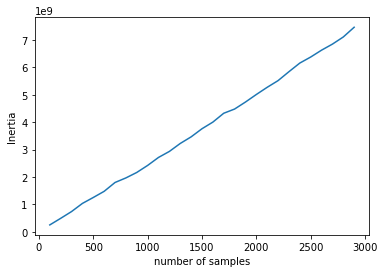

In [67]:
plt.plot(sample_points, kmeans_je)
plt.xlabel('number of samples')
plt.ylabel('Inertia')
# plt.savefig('../doc/figures/kmeans_innertia_coincide.pdf',pad_inches=0,bbox_inches='tight')

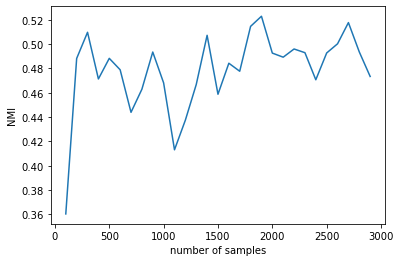

In [68]:
plt.plot(sample_points,kmeans_nmi)
plt.xlabel('number of samples')
plt.ylabel('NMI')
# plt.savefig('../doc/figures/kmeans_nmi_coincide.pdf',pad_inches=0,bbox_inches='tight')

## Obtain results of hierarchical clustering

In [8]:
hierarchi_result = [0 for i in range(3)]
hierarchi_result[0] = hierarchical()
hierarchi_result[1] = hierarchical('complete')
hierarchi_result[2] = hierarchical('average')
hierarchi_df = pd.DataFrame(hierarchi_result,columns=['NMI'],index=['single','complete','average'])
hierarchi_df

,NMI
single,0.133905
complete,0.413829
average,0.435661


In [9]:
hierarchi_3k_result = [0 for i in range(3)]
hierarchi_3k_result[0] = hierarchical(n_samples=3000)
hierarchi_3k_result[1] = hierarchical('complete', n_samples=3000)
hierarchi_3k_result[2] = hierarchical('average', n_samples=3000)
hierarchi_3k_df = pd.DataFrame(hierarchi_3k_result,columns=['NMI'],index=['single','complete','average'])
hierarchi_3k_df

,NMI
single,0.028254
complete,0.384793
average,0.284408


In [70]:
hierarchi_single = []
hierarchi_complete = []
hierarchi_average = []
sample_points = range(100,3000,100)
for i in sample_points:
    hierarchi_single.append(hierarchical(n_samples=i))
    hierarchi_complete.append(hierarchical(linkage='complete', n_samples=i))
    hierarchi_average.append(hierarchical(linkage='average', n_samples=i))

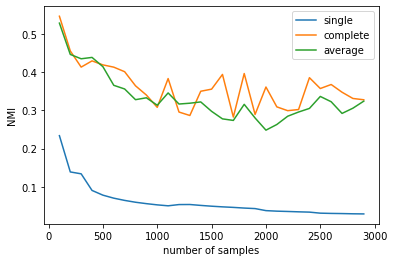

In [73]:
plt.plot(sample_points,hierarchi_single)
plt.plot(sample_points,hierarchi_complete)
plt.plot(sample_points,hierarchi_average)
plt.legend(['single','complete','average'])
plt.xlabel('number of samples')
plt.ylabel('NMI')
# plt.savefig('../doc/figures/hierarchical_nmi.pdf',pad_inches=0,bbox_inches='tight')

## Obtain results of spectual clustering

In [10]:
spectual_result = [0 for i in range(6)]
j = 0
for i in [1,2,4]:
    spectual_result[j] = spectual(aff='rbf', para=i)
    j += 1

for i in [5, 50, 100]:
    spectual_result[j] = spectual(aff='nearest_neighbors', para=i)
    j += 1

spectual_df = pd.DataFrame(spectual_result,columns=['NMI'],index=['rbf, gamma=1','rbf, gamma=2','rbf, gamma=4','knn, k=5','knn, k=50','knn, k=100'])
spectual_df

C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,NMI
"rbf, gamma=1",0.101404
"rbf, gamma=2",0.076044
"rbf, gamma=4",0.074711
"knn, k=5",0.614761
"knn, k=50",0.519622
"knn, k=100",0.468890


## Test number of clusters

In [12]:
clusters = np.arange(2,20).astype(int)
kmeans_n_clusters_result = [[0 for i in range(2)] for j in range(len(clusters))]

j = 0
for i in range(2,20):
    kmeans_n_clusters_result[j][0], kmeans_n_clusters_result[j][1] = Kmeans(n_clusters=i)
    j += 1
    # result.append(spectual(n_clusters=i,aff='nearest_neighbors',para=5))
kmeans_n_clusters_df = pd.DataFrame(kmeans_n_clusters_result,index=clusters,columns=['J_e','NMI'])

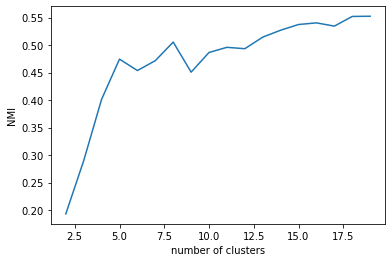

In [14]:
kmeans_n_clusters_df.iloc[:,1].plot(xlabel='number of clusters',ylabel='NMI')
# plt.savefig('../doc/figures/kmeans_n_clusters_nmi.pdf',pad_inches=0,bbox_inches='tight')

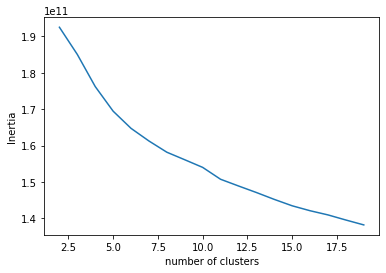

In [16]:
kmeans_n_clusters_df.iloc[:,0].plot(xlabel='number of clusters',ylabel='Inertia')
# plt.savefig('../doc/figures/kmeans_n_clusters_inertia.pdf',pad_inches=0,bbox_inches='tight')

In [79]:
kmeans_n_clusters_result = []
for i in range(2,21):
    kmeans_n_clusters_result.append(Kmeans(n_clusters=i,n_samples=3000,si=True))

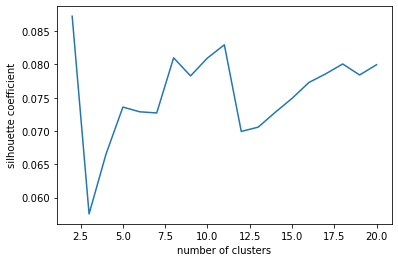

In [81]:
plt.plot(range(2,21),kmeans_n_clusters_result)
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficient')
# plt.savefig('../doc/figures/kmeans_silhouette.pdf',pad_inches=0,bbox_inches='tight')

In [85]:
hierarchi_n_clusters_result = []
for i in range(2,21):
    hierarchi_n_clusters_result.append(hierarchical(n_clusters=i,n_samples=300,si=True))

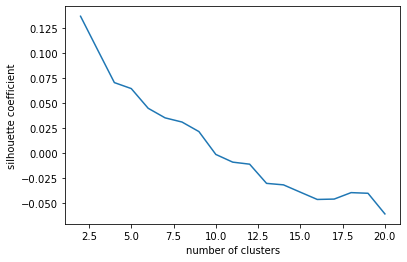

In [86]:
plt.plot(range(2,21),hierarchi_n_clusters_result)
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficient')
# plt.savefig('../doc/figures/hierarchi_silhouette.pdf',pad_inches=0,bbox_inches='tight')

In [87]:
spectual_n_clusters_result = []
for i in range(2,21):
    spectual_n_clusters_result.append(spectual(n_clusters=i,n_samples=300,si=True))

C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: 

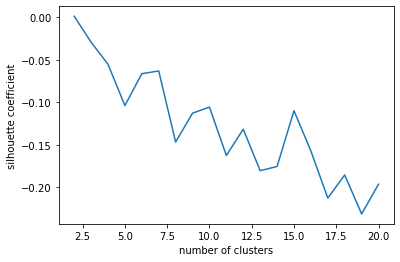

In [88]:
plt.plot(range(2,21),spectual_n_clusters_result)
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficient')
# plt.savefig('../doc/figures/spectual_silhouette.pdf',pad_inches=0,bbox_inches='tight')